In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Preprocessing: Detect Face and Eyes with Haar Cascade

In [3]:
img = cv2.imread('./data/test_images/image_1.jpg')
img.shape

(1440, 1080, 3)

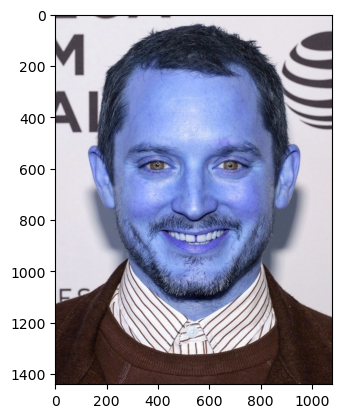

In [4]:
plt.imshow(img)
plt.show()

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1440, 1080)

In [6]:
gray

array([[ 78,  74,  72, ..., 229, 228, 227],
       [ 74,  72,  69, ..., 229, 228, 227],
       [ 66,  69,  73, ..., 229, 228, 227],
       ...,
       [ 13,  15,  19, ...,  24,  23,  28],
       [ 17,  15,  17, ...,  25,  25,  30],
       [ 21,  13,  13, ...,  23,  25,  27]], dtype=uint8)

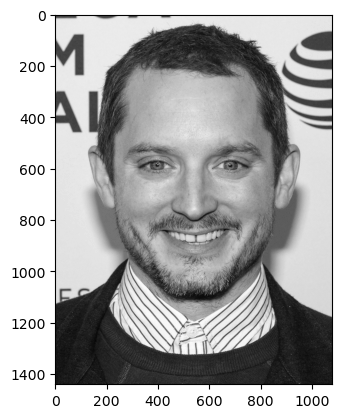

In [7]:
plt.imshow(gray, cmap='gray')
plt.show()

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [9]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[150, 278, 779, 779]])

In [10]:
(x, y, w, h) = faces[0]
x, y, w, h

(150, 278, 779, 779)

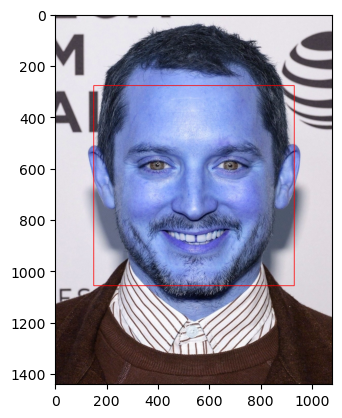

In [11]:
cv2.destroyAllWindows()
face_img = cv2.rectangle(img,(x, y), (x + w, y + h),(255, 0, 0), 2)
plt.imshow(face_img)
plt.show()

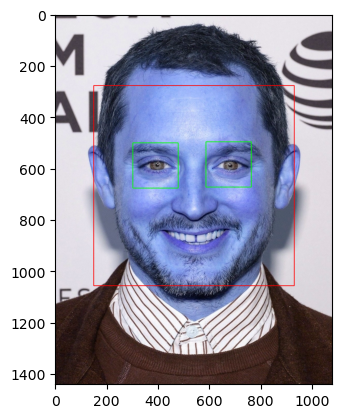

In [12]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = face_img[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

## Preprocessing: Crop the Facial Region of Image

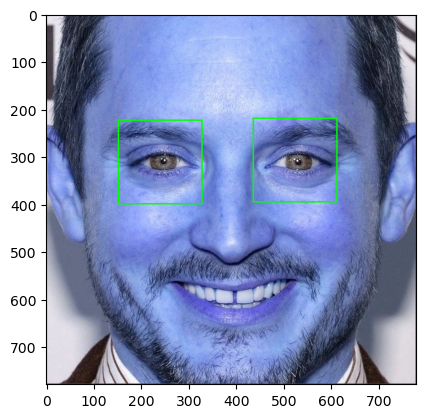

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

## Preprocessing: Save Cropped Facial Region if Eyes >= 2

In [16]:
def get_cropped_image_if_2_eyes (image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y: y + h, x: x + w]
        roi_color = img[y: y + h, x: x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

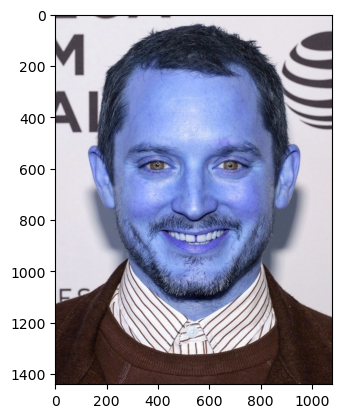

In [17]:
original_image = cv2.imread('./data/test_images/image_1.jpg')
plt.imshow(original_image)
plt.show()

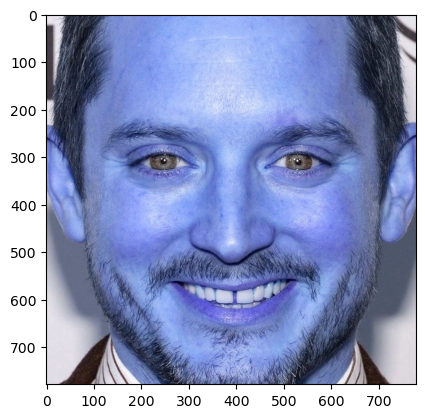

In [18]:
cropped_img = get_cropped_image_if_2_eyes('./data/test_images/image_1.jpg')
plt.imshow(cropped_img)
plt.show()

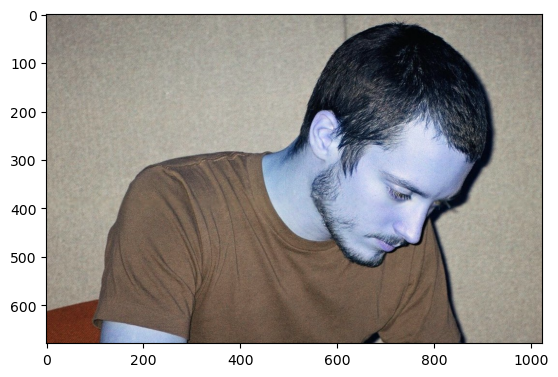

In [19]:
orginal_image_obstructed = cv2.imread('./data/test_images/image_2.jpg')
plt.imshow(orginal_image_obstructed)
plt.show()

In [20]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./data/test_images/image_2.jpg')
cropped_image_no_2_eyes

In [21]:
path_to_data = "./data/dataset/"
path_to_cropped_data = "./data/cropped_images/"

In [22]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [23]:
img_dirs

['./data/dataset/billy_boyd',
 './data/dataset/dominic_monaghan',
 './data/dataset/elijah_wood',
 './data/dataset/martin_freeman',
 './data/dataset/sean_astin']

In [24]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [25]:
cropped_image_dirs = []
hobbit_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    hobbit_name = img_dir.split('/')[-1]
    hobbit_file_names_dict[hobbit_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + hobbit_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name = hobbit_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            hobbit_file_names_dict[hobbit_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./data/cropped_images/billy_boyd
Generating cropped images in folder:  ./data/cropped_images/dominic_monaghan
Generating cropped images in folder:  ./data/cropped_images/elijah_wood
Generating cropped images in folder:  ./data/cropped_images/martin_freeman
Generating cropped images in folder:  ./data/cropped_images/sean_astin


## Preprocessing: Use Wavelet Transform to Extract Facial Features

In [27]:
import numpy as np
import pywt
import cv2    

# From stackoverflow
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

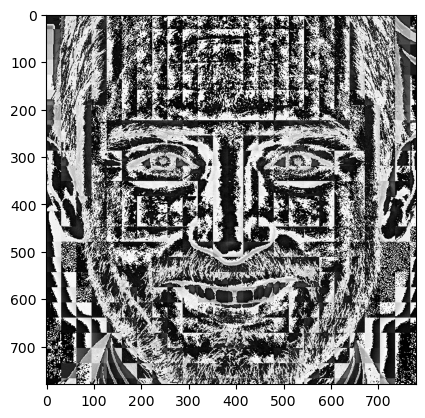

In [28]:
img_har = w2d(cropped_img,'db1',5)
plt.imshow(img_har, cmap='gray')
plt.show()

In [29]:
hobbit_file_names_dict = {}
for img_dir in cropped_image_dirs:
    hobbit_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    hobbit_file_names_dict[hobbit_name] = file_list
hobbit_file_names_dict

{'billy_boyd': ['./data/cropped_images/billy_boyd\\billy_boyd1.png',
  './data/cropped_images/billy_boyd\\billy_boyd10.png',
  './data/cropped_images/billy_boyd\\billy_boyd11.png',
  './data/cropped_images/billy_boyd\\billy_boyd12.png',
  './data/cropped_images/billy_boyd\\billy_boyd13.png',
  './data/cropped_images/billy_boyd\\billy_boyd14.png',
  './data/cropped_images/billy_boyd\\billy_boyd15.png',
  './data/cropped_images/billy_boyd\\billy_boyd16.png',
  './data/cropped_images/billy_boyd\\billy_boyd17.png',
  './data/cropped_images/billy_boyd\\billy_boyd18.png',
  './data/cropped_images/billy_boyd\\billy_boyd19.png',
  './data/cropped_images/billy_boyd\\billy_boyd2.png',
  './data/cropped_images/billy_boyd\\billy_boyd20.png',
  './data/cropped_images/billy_boyd\\billy_boyd21.png',
  './data/cropped_images/billy_boyd\\billy_boyd22.png',
  './data/cropped_images/billy_boyd\\billy_boyd23.png',
  './data/cropped_images/billy_boyd\\billy_boyd24.png',
  './data/cropped_images/billy_boyd\

In [30]:
class_dict = {}
count = 0
for hobbit_name in hobbit_file_names_dict.keys():
    class_dict[hobbit_name] = count
    count = count + 1
class_dict

{'billy_boyd': 0,
 'dominic_monaghan': 1,
 'elijah_wood': 2,
 'martin_freeman': 3,
 'sean_astin': 4}

In [31]:
X, y = [], []

for hobbit_name, training_files in hobbit_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[hobbit_name])

In [32]:
len(X)

218

In [33]:
# Avoid sklearn int warnings
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(218, 4096)

## Model Building With SVM

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6363636363636364

In [37]:
len(X_test)

55

In [38]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.70      0.64      0.67        11
           2       0.60      0.69      0.64        13
           3       0.70      0.54      0.61        13
           4       0.50      0.75      0.60         8

    accuracy                           0.64        55
   macro avg       0.65      0.64      0.64        55
weighted avg       0.66      0.64      0.64        55



In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [41]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.675379,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.375000,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.730682,{'logisticregression__C': 1}


In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [43]:
best_estimators['svm'].score(X_test,y_test)

0.7090909090909091

In [44]:
best_estimators['random_forest'].score(X_test,y_test)

0.34545454545454546

In [45]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6545454545454545

In [46]:
best_clf = best_estimators['svm']

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  1,  0,  1,  1],
       [ 2,  8,  1,  0,  0],
       [ 0,  0, 10,  1,  2],
       [ 0,  2,  2,  7,  2],
       [ 0,  0,  0,  1,  7]], dtype=int64)

In [48]:
import joblib
joblib.dump(best_clf, 'hobbit_model.pkl') 

['hobbit_model.pkl']

In [49]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))